# Goal:

Objective is to find natural cluster of the data. Because we want to explore that if there is any symptom we can found before the attack and get any cluster for that. 

## Loading data

In [1]:
import pandas as pd
df = pd.read_csv (r'E:\NMT MS\Research\New Intrusion data\MachineLearningCSV (1)\MachineLearningCVE\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702162,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [2]:
df.shape

(170366, 79)

# Creating new variable

To use the Mahalonobis distance we need to calculate the covariance among the varaibles. For this reason we have to remove the variables which are very correlated otherwise the singularity problem might arise.

In [3]:
df['Fwd Packet Length Range'] = df[' Fwd Packet Length Max']-df[' Fwd Packet Length Min']
df['Bwd Packet Length Range'] = df['Bwd Packet Length Max']-df[' Bwd Packet Length Min']
df['Flow IAT Range'] = df[' Flow IAT Max']-df[' Flow IAT Min']
df['Fwd IAT Range'] = df[' Fwd IAT Max']-df[' Fwd IAT Min']
df['Bwd IAT Range'] = df[' Bwd IAT Max']-df[' Bwd IAT Min']

df['Rnage Packet Length'] = df[' Max Packet Length']-df[' Min Packet Length']
df['Rnage Active'] = df[' Active Max']-df[' Active Min']
df['Rnage Idle'] = df[' Idle Max']-df[' Idle Min']

In [4]:
df.shape

(170366, 87)

In [5]:
drop_list = [' Fwd Packet Length Max',' Fwd Packet Length Min','Bwd Packet Length Max',' Bwd Packet Length Min',
            ' Flow IAT Max',' Flow IAT Min',' Fwd IAT Max',' Fwd IAT Min',' Bwd IAT Max',' Bwd IAT Min',
            ' Max Packet Length',' Min Packet Length',' Active Max',' Active Min',' Idle Max',' Idle Min']

# Remove two columns name is 'C' and 'D'
df = df.drop(drop_list, axis = 1)
df.shape

(170366, 71)

In [6]:
redundant_column = [' Fwd Packet Length Mean',
       ' Fwd Packet Length Std',
       ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std',
                   ' Flow IAT Mean', 
                    ' Flow IAT Std',
                    ' Flow IAT Std',
                    ' Fwd IAT Mean',
                   ' Bwd IAT Mean', 
                    ' Bwd IAT Std',
                   ' Packet Length Mean',
                    ' Packet Length Std',
                   ' Packet Length Variance',
                    'Active Mean',
                   ' Active Std', 
                    'Idle Mean',
                    ' Idle Std']
df = df.drop(redundant_column, axis = 1)
df.shape

(170366, 55)

In [7]:
bad_feature_from_vif = [' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets','Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length',' SYN Flag Count',
       ' RST Flag Count',' CWE Flag Count', ' ECE Flag Count',' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk',
       ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk',
       ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',
       ' Subflow Fwd Bytes', ' Subflow Bwd Packets']

df = df.drop(bad_feature_from_vif, axis = 1)
df.shape


(170366, 33)

In [7]:
#df.melt('Label').groupby(['Label']).size()
#df.groupby(' Label').count()


In [8]:
## Coulmns with missing values

# Handling Missing Value

<AxesSubplot:xlabel='index'>

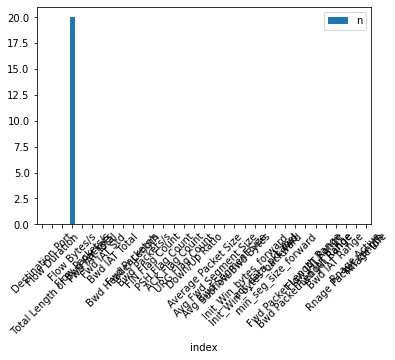

In [8]:
df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [9]:
# Find the column
df.columns[df.isna().any()].tolist()

['Flow Bytes/s']

In [10]:
#df.drop("Flow Bytes/s", axis=1, inplace=True)

In [11]:
df = df.dropna()
df.shape

(170346, 33)

<AxesSubplot:xlabel='index'>

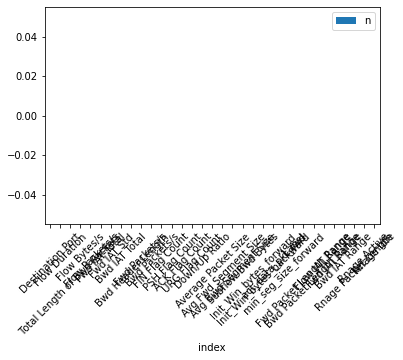

In [12]:
df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [405]:
#df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

# Multicollinearity

For the same reason of multicollinearity we have removed several intercorrleated variables from the data.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
## VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

bad_feature_from_vif = [' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets','Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length',' SYN Flag Count',
       ' RST Flag Count',' CWE Flag Count', ' ECE Flag Count',' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk',
       ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk',
       ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',
       ' Subflow Fwd Bytes', ' Subflow Bwd Packets']

NameError: name 'X' is not defined

# Splitting X and Y 

In [15]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Length of Bwd Packets',
       'Flow Bytes/s', ' Flow Packets/s', 'Fwd IAT Total', ' Fwd IAT Std',
       'Bwd IAT Total', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', 'FIN Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' Down/Up Ratio',
       ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd',
       ' min_seg_size_forward', ' Label', 'Fwd Packet Length Range',
       'Bwd Packet Length Range', 'Flow IAT Range', 'Fwd IAT Range',
       'Bwd IAT Range', 'Rnage Packet Length', 'Rnage Active', 'Rnage Idle'],
      dtype='object')

In [13]:
#Move last Column to First Column
new_cols = [' Destination Port', ' Flow Duration', ' Total Length of Bwd Packets',
       'Flow Bytes/s', ' Flow Packets/s', 'Fwd IAT Total', ' Fwd IAT Std',
       'Bwd IAT Total', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', 'FIN Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' Down/Up Ratio',
       ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd',
       ' min_seg_size_forward', 'Fwd Packet Length Range',
       'Bwd Packet Length Range', 'Flow IAT Range', 'Fwd IAT Range',
       'Bwd IAT Range', 'Rnage Packet Length', 'Rnage Active', 'Rnage Idle',' Label']

df=df.reindex(columns=new_cols)
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Length of Bwd Packets',
       'Flow Bytes/s', ' Flow Packets/s', 'Fwd IAT Total', ' Fwd IAT Std',
       'Bwd IAT Total', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', 'FIN Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' Down/Up Ratio',
       ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd',
       ' min_seg_size_forward', 'Fwd Packet Length Range',
       'Bwd Packet Length Range', 'Flow IAT Range', 'Fwd IAT Range',
       'Bwd IAT Range', 'Rnage Packet Length', 'Rnage Active', 'Rnage Idle',
       ' Label'],
      dtype='object')

In [14]:
# Removing Y and Id
X = df.iloc [: ,:-1].values    # independent variables

# Removing Id
#X = X.iloc[:,1:]

# Keeping only Y
y = df.iloc [: , -1].values    # dependent variables

In [409]:
# To get rid of the Singlular matrix we need to get rid of highly correlated features. 
# To find the correlated features we are calculating the VIF. need to get rid of inf or -inf to find vif.

## Infity handing

There are few variables which have infinity values, we replaced this values with the valid maxium entries from the required column. 

In [15]:

import numpy as np

# find min and max values for each column, ignoring nan, -inf, and inf
mins = [np.nanmin(X[:, i][X[:, i] != -np.inf]) for i in range(X.shape[1])]
maxs = [np.nanmax(X[:, i][X[:, i] != np.inf]) for i in range(X.shape[1])]

# go through matrix one column at a time and replace  + and -infinity 
# with the max or min for that column
for i in range(X.shape[1]):
    X[:, i][X[:, i] == -np.inf] = mins[i]
    X[:, i][X[:, i] == np.inf] = maxs[i]

## Scaling

In [19]:
# feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

# For Mahalonobis distance

In [20]:
X = pd.DataFrame(X)

In [22]:
cov_X = np.cov(X.T)
IV = np.linalg.inv(cov_X)

In [23]:
def maha(wt,data):
    # import the math module 
    import math
    diff = data-wt
    left_term = np.dot(diff, IV)
    mahal = np.dot(left_term, diff.T)
    dist = math.sqrt(mahal)
    return dist

In [24]:
#maha(wt = weight[:,0],data = X[0,0:len(X[0])-1])
#wt = weight[:,0]
#data = X[0,0:len(X[0])-1]
#distance.euclidean(wt,data)

In [25]:
X = np.array(X)

#Self organizing map clustering algorithm
# The Academician
import numpy as np, numpy.random
from scipy.spatial import distance
np.set_printoptions(suppress=True) #Force-suppress all exponential notation

k = 10
p = 1
alpha = 0.5 # Initial learning rate


# Print the number of data and dimension 
n = len(X)
d = len(X[0])
addZeros = np.zeros((n, 1))
X = np.append(X, addZeros, axis=1)
print("The SOM algorithm: \n")
#print("The training data: \n", X)
print("\nTotal number of data: ",n)
print("Total number of features: ",d)
print("Total number of Clusters k: ",k)



The SOM algorithm: 


Total number of data:  170346
Total number of features:  32
Total number of Clusters k:  10


In [26]:
C = np.zeros((k,d+1))

weight = np.random.rand(len(X[0])-1,k)
print("\nThe initial weight: \n", np.round(weight,2))


The initial weight: 
 [[0.2  0.93 0.86 0.14 0.31 0.44 0.26 0.89 0.53 0.95]
 [0.32 0.62 0.59 0.8  0.38 0.62 0.96 0.45 0.86 0.3 ]
 [0.11 0.22 0.8  0.66 0.6  0.13 0.73 0.06 0.14 0.86]
 [0.53 0.4  0.82 0.31 0.04 0.29 0.91 0.96 0.99 0.58]
 [0.3  0.07 0.35 0.63 0.34 0.89 0.82 0.13 0.52 0.84]
 [0.49 0.77 0.62 0.1  0.34 0.85 0.78 0.08 0.16 0.46]
 [0.85 0.11 0.25 0.69 0.   0.4  0.6  0.33 0.53 0.96]
 [0.8  0.61 0.52 0.63 0.61 0.39 0.13 0.56 0.9  0.51]
 [0.91 0.45 0.07 0.34 0.67 0.85 0.68 0.15 0.77 0.44]
 [0.8  0.47 0.43 0.85 0.89 0.83 0.28 0.17 0.4  0.81]
 [0.53 0.25 0.31 0.49 0.97 0.23 0.54 0.75 0.63 0.37]
 [0.44 0.63 0.42 0.66 0.11 0.29 0.01 0.63 0.25 0.26]
 [0.08 0.21 0.77 0.34 0.6  0.91 0.92 0.41 0.14 0.94]
 [0.7  0.25 0.3  0.61 0.8  0.78 0.51 0.22 0.35 0.63]
 [0.49 0.31 0.91 0.15 0.02 0.61 0.44 0.93 0.65 0.02]
 [0.15 0.01 0.19 0.16 0.1  0.34 0.8  0.13 0.43 0.89]
 [0.32 0.73 0.79 0.39 0.28 0.25 0.86 0.82 0.84 0.81]
 [0.56 0.75 0.71 0.35 0.43 0.95 0.43 0.12 0.32 0.07]
 [0.31 0.57 0.54 0.99 0

In [27]:
weight.shape

(32, 10)

## Running the main algorithm

In [422]:
# Testing
#maha(wt = weight[:,0], data = X[0,0:1])

190333.33434674933

In [28]:
for it in range(100): # Total number of iterations
    for i in range(n):
        distMin = 99999999
        for j in range(k):
            #dist = np.square(distance.euclidean(weight[:,j], X[i,0:d]))
            dist = maha(wt = weight[:,j], data = X[i,0:d])
            if distMin>dist:
                distMin = dist
                jMin = j
        weight[:,jMin] = weight[:,jMin]*(1-alpha) + alpha*X[i,0:d]   
    alpha = 0.5*alpha
    
print("\nThe final weight: \n",np.round(weight,4))


The final weight: 
 [[0.1991 0.9309 0.8641 0.1448 0.3085 0.4417 0.2565 0.8926 0.1211 0.9455]
 [0.3174 0.6215 0.5888 0.8025 0.3807 0.6168 0.9558 0.4464 0.1032 0.3025]
 [0.1122 0.2169 0.8031 0.6619 0.5981 0.1269 0.7256 0.0623 0.     0.8574]
 [0.5278 0.3986 0.8197 0.3136 0.0422 0.2919 0.9072 0.9569 0.1134 0.5751]
 [0.2988 0.0678 0.3481 0.634  0.3358 0.8948 0.8186 0.1267 0.4114 0.8438]
 [0.4884 0.7686 0.6245 0.1004 0.3362 0.8532 0.784  0.0788 0.1008 0.4596]
 [0.8517 0.112  0.2469 0.6855 0.0043 0.3979 0.6032 0.3287 0.014  0.9616]
 [0.8048 0.6097 0.5177 0.6319 0.6128 0.386  0.1344 0.5602 0.0929 0.5095]
 [0.9063 0.4466 0.0652 0.3414 0.6744 0.8549 0.6837 0.1466 0.0001 0.4435]
 [0.8043 0.4717 0.4302 0.8455 0.8935 0.8269 0.2844 0.1745 0.0163 0.8081]
 [0.5347 0.2452 0.3136 0.4854 0.9697 0.2319 0.5364 0.7479 0.0031 0.3658]
 [0.4419 0.6347 0.4228 0.6603 0.1123 0.2894 0.0055 0.6299 0.0111 0.2575]
 [0.0753 0.2099 0.7707 0.3382 0.5957 0.9109 0.9161 0.4105 0.238  0.9382]
 [0.7039 0.2476 0.3006 0.6131 

In [29]:
for i in range(len(X[0])-1):    
    cNumber = np.where(weight[i] == np.amax(weight[i]))
    X[i,d] = cNumber[0]
    
#print("\nThe data with cluster number: \n", X)

In [30]:
predicted = pd.DataFrame(X)

In [31]:
predicted.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.005936,0.942462,1.596810e-05,0.111969,0.400000,9.416667e-01,0.066009,9.416667e-01,0.000142,1.414734e-07,...,0.533333,0.017252,0.046195,0.137500,0.137500,0.137500,0.039512,0.018067,0.094681,9.0
1,0.005936,0.945614,2.028389e-05,0.111969,0.400000,9.416667e-01,0.056720,9.416667e-01,0.000236,1.997526e-07,...,0.533333,0.017252,0.077093,0.137500,0.137500,0.137500,0.048759,0.015795,0.092665,6.0
2,0.000000,0.999546,0.000000e+00,0.111969,0.400000,1.000000e+00,0.063436,0.000000e+00,0.000000,4.168559e-07,...,0.000000,0.000000,0.000000,0.500833,0.500833,0.000000,0.000000,0.226291,0.527579,9.0
3,0.006760,0.502183,6.732057e-06,0.111969,0.400000,5.025000e-01,0.254808,1.766225e-03,0.000028,4.978268e-08,...,0.333333,0.046789,0.111111,0.500000,0.499997,0.000476,0.062500,0.000000,0.000000,7.0
4,0.000809,0.000002,5.135566e-07,0.112645,0.402974,3.333333e-08,0.000000,3.333333e-08,0.000012,2.478315e-03,...,0.533333,0.000000,0.000000,0.000002,0.000000,0.000000,0.004709,0.000000,0.000000,5.0


In [45]:
#predicted.columns

RangeIndex(start=0, stop=63, step=1)

In [32]:
predicted["Actual_cat"] = y

In [33]:
predicted.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,Actual_cat
0,0.005936,0.942462,1.596810e-05,0.111969,0.400000,9.416667e-01,0.066009,9.416667e-01,0.000142,1.414734e-07,...,0.017252,0.046195,0.137500,0.137500,0.137500,0.039512,0.018067,0.094681,9.0,BENIGN
1,0.005936,0.945614,2.028389e-05,0.111969,0.400000,9.416667e-01,0.056720,9.416667e-01,0.000236,1.997526e-07,...,0.017252,0.077093,0.137500,0.137500,0.137500,0.048759,0.015795,0.092665,6.0,BENIGN
2,0.000000,0.999546,0.000000e+00,0.111969,0.400000,1.000000e+00,0.063436,0.000000e+00,0.000000,4.168559e-07,...,0.000000,0.000000,0.500833,0.500833,0.000000,0.000000,0.226291,0.527579,9.0,BENIGN
3,0.006760,0.502183,6.732057e-06,0.111969,0.400000,5.025000e-01,0.254808,1.766225e-03,0.000028,4.978268e-08,...,0.046789,0.111111,0.500000,0.499997,0.000476,0.062500,0.000000,0.000000,7.0,BENIGN
4,0.000809,0.000002,5.135566e-07,0.112645,0.402974,3.333333e-08,0.000000,3.333333e-08,0.000012,2.478315e-03,...,0.000000,0.000000,0.000002,0.000000,0.000000,0.004709,0.000000,0.000000,5.0,BENIGN


In [34]:
predicted.columns = [' Destination Port', ' Flow Duration', ' Total Length of Bwd Packets',
       'Flow Bytes/s', ' Flow Packets/s', 'Fwd IAT Total', ' Fwd IAT Std',
       'Bwd IAT Total', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', 'FIN Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' Down/Up Ratio',
       ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd',
       ' min_seg_size_forward', 'Fwd Packet Length Range',
       'Bwd Packet Length Range', 'Flow IAT Range', 'Fwd IAT Range',
       'Bwd IAT Range', 'Rnage Packet Length', 'Rnage Active', 'Rnage Idle',"Predicted","Actual"]


In [35]:
predicted.head()

,Destination Port,Flow Duration,Total Length of Bwd Packets,Flow Bytes/s,Flow Packets/s,Fwd IAT Total,Fwd IAT Std,Bwd IAT Total,Bwd Header Length,Fwd Packets/s,...,Fwd Packet Length Range,Bwd Packet Length Range,Flow IAT Range,Fwd IAT Range,Bwd IAT Range,Rnage Packet Length,Rnage Active,Rnage Idle,Predicted,Actual
0,0.005936,0.942462,1.596810e-05,0.111969,0.400000,9.416667e-01,0.066009,9.416667e-01,0.000142,1.414734e-07,...,0.017252,0.046195,0.137500,0.137500,0.137500,0.039512,0.018067,0.094681,9.0,BENIGN
1,0.005936,0.945614,2.028389e-05,0.111969,0.400000,9.416667e-01,0.056720,9.416667e-01,0.000236,1.997526e-07,...,0.017252,0.077093,0.137500,0.137500,0.137500,0.048759,0.015795,0.092665,6.0,BENIGN
2,0.000000,0.999546,0.000000e+00,0.111969,0.400000,1.000000e+00,0.063436,0.000000e+00,0.000000,4.168559e-07,...,0.000000,0.000000,0.500833,0.500833,0.000000,0.000000,0.226291,0.527579,9.0,BENIGN
3,0.006760,0.502183,6.732057e-06,0.111969,0.400000,5.025000e-01,0.254808,1.766225e-03,0.000028,4.978268e-08,...,0.046789,0.111111,0.500000,0.499997,0.000476,0.062500,0.000000,0.000000,7.0,BENIGN
4,0.000809,0.000002,5.135566e-07,0.112645,0.402974,3.333333e-08,0.000000,3.333333e-08,0.000012,2.478315e-03,...,0.000000,0.000000,0.000002,0.000000,0.000000,0.004709,0.000000,0.000000,5.0,BENIGN


In [36]:
#predicted.melt('Actual_Class').groupby(['Actual_Class','Predicted_Class']).size()
pd.crosstab(index=predicted['Actual'], columns=predicted['Predicted'])

Predicted,0.0,1.0,3.0,4.0,5.0,6.0,7.0,9.0
Actual,,,,,,,,
BENIGN,168136,3,4,4,5,4,4,6
Web Attack � Brute Force,1507,0,0,0,0,0,0,0
Web Attack � Sql Injection,21,0,0,0,0,0,0,0
Web Attack � XSS,652,0,0,0,0,0,0,0


# K-means clustering

In [434]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

In [438]:
df.head()

,Destination Port,Flow Duration,Total Length of Bwd Packets,Flow Bytes/s,Flow Packets/s,Fwd IAT Total,Fwd IAT Std,Bwd IAT Total,Bwd Header Length,Fwd Packets/s,...,min_seg_size_forward,Fwd Packet Length Range,Bwd Packet Length Range,Flow IAT Range,Fwd IAT Range,Bwd IAT Range,Rnage Packet Length,Rnage Active,Rnage Idle,Label
0,389,113095465,10012,1.740123e+02,0.636630,113000000,5.491986e+06,113000000,768,0.424420,...,32,403,607,16499997,16499997,16499997,923,1628731,9762397,BENIGN
1,389,113473706,12718,2.122254e+02,0.951762,113000000,4.719143e+06,113000000,1280,0.599258,...,32,403,1013,16499998,16499998,16499997,1139,1423920,9554488,BENIGN
2,0,119945515,0,0.000000e+00,1.250568,120000000,5.277837e+06,0,0,1.250568,...,0,0,0,60100000,60100000,0,0,20399994,54397812,BENIGN
3,443,60261928,4221,1.087088e+02,0.265508,60300000,2.120000e+07,211947,152,0.149348,...,20,1093,1460,59999999,59999689,57061,1460,0,0,BENIGN
4,53,269,322,1.576208e+06,14869.888480,4,0.000000e+00,4,64,7434.944238,...,32,0,0,257,0,0,110,0,0,BENIGN


In [439]:

# Removing Y and Id
X = df.iloc [: ,:-1].values    # independent variables


import numpy as np

# find min and max values for each column, ignoring nan, -inf, and inf
mins = [np.nanmin(X[:, i][X[:, i] != -np.inf]) for i in range(X.shape[1])]
maxs = [np.nanmax(X[:, i][X[:, i] != np.inf]) for i in range(X.shape[1])]

# go through matrix one column at a time and replace  + and -infinity 
# with the max or min for that column
for i in range(X.shape[1]):
    X[:, i][X[:, i] == -np.inf] = mins[i]
    X[:, i][X[:, i] == np.inf] = maxs[i]

In [440]:
# feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [441]:
data = pd.DataFrame(X)

In [442]:
# from sklearn.cluster import KMeans 
clusters = 7
  
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(data) 

labels = kmeans.labels_

In [443]:

#Glue back to originaal data
data['clusters'] = labels


In [444]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,clusters
0,0.005936,0.942462,1.596810e-05,0.111969,0.400000,9.416667e-01,0.066009,9.416667e-01,0.000142,1.414734e-07,...,0.533333,0.017252,0.046195,0.137500,0.137500,0.137500,0.039512,0.018067,0.094681,5
1,0.005936,0.945614,2.028389e-05,0.111969,0.400000,9.416667e-01,0.056720,9.416667e-01,0.000236,1.997526e-07,...,0.533333,0.017252,0.077093,0.137500,0.137500,0.137500,0.048759,0.015795,0.092665,5
2,0.000000,0.999546,0.000000e+00,0.111969,0.400000,1.000000e+00,0.063436,0.000000e+00,0.000000,4.168559e-07,...,0.000000,0.000000,0.000000,0.500833,0.500833,0.000000,0.000000,0.226291,0.527579,5
3,0.006760,0.502183,6.732057e-06,0.111969,0.400000,5.025000e-01,0.254808,1.766225e-03,0.000028,4.978268e-08,...,0.333333,0.046789,0.111111,0.500000,0.499997,0.000476,0.062500,0.000000,0.000000,2
4,0.000809,0.000002,5.135566e-07,0.112645,0.402974,3.333333e-08,0.000000,3.333333e-08,0.000012,2.478315e-03,...,0.533333,0.000000,0.000000,0.000002,0.000000,0.000000,0.004709,0.000000,0.000000,1


In [445]:
data["Actual_cat"] = y

In [448]:
data.columns = [' Destination Port', ' Flow Duration', ' Total Length of Bwd Packets',
       'Flow Bytes/s', ' Flow Packets/s', 'Fwd IAT Total', ' Fwd IAT Std',
       'Bwd IAT Total', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', 'FIN Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' Down/Up Ratio',
       ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd',
       ' min_seg_size_forward', 'Fwd Packet Length Range',
       'Bwd Packet Length Range', 'Flow IAT Range', 'Fwd IAT Range',
       'Bwd IAT Range', 'Rnage Packet Length', 'Rnage Active', 'Rnage Idle',"Predicted","Actual"]

In [447]:
pd.crosstab(index=predicted['Actual'], columns=predicted['Predicted'])

Predicted,0.0,1.0,2.0,3.0,5.0,6.0,7.0,8.0
Actual,,,,,,,,
BENIGN,168139,2,9,3,3,2,5,3
Web Attack � Brute Force,1507,0,0,0,0,0,0,0
Web Attack � Sql Injection,21,0,0,0,0,0,0,0
Web Attack � XSS,652,0,0,0,0,0,0,0


In [449]:
pd.crosstab(index=data['Actual'], columns=data['Predicted'])

Predicted,0,1,2,3,4,5,6
Actual,,,,,,,
BENIGN,14858,80754,23605,19155,13699,3963,12132
Web Attack � Brute Force,0,0,1364,143,0,0,0
Web Attack � Sql Injection,0,0,12,9,0,0,0
Web Attack � XSS,15,0,614,6,17,0,0


# Idea to implement:

1. Use different distance measure to observe the clustering performance. (Euclidean, Mahalonobis, Cosine)



kohonen is ad-hoc!!! Can use different models to check... LVQ better than kohonen, LVQ worst than back propagation. Train the model with adversarial attack data also, to get rid of adverserial attack. (Vaccination of the ML model)